02 - Tratamento dos dados da base KEPLER.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from functions import *

Tratamento das colunas

In [2]:
kepler = pd.read_csv('./data/kepler/kepler.csv')

kepler_columns = [
    'koi_disposition',
    'ra',
    'dec',
    'koi_steff',
    'koi_srad',
    'koi_prad',
    'koi_teq',
    'koi_slogg',
    'koi_period',
    'koi_depth',
    'koi_insol'
]

kepler_data = kepler[kepler_columns].copy()

kepler_columns_name = {
    'koi_disposition': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'koi_steff' : 'stellar_temperature',
    'koi_srad' : 'stellar_radius',
    'koi_prad' : 'planet_radius',
    'koi_teq' : 'eq_temperature',
    'koi_slogg' : 'stellar_sur_gravity',
    'koi_period' : 'orbital_period',
    'koi_depth' : 'depth',
    'koi_insol' : 'insol_flux'
}

kepler_data.rename(columns=kepler_columns_name, inplace=True)

kepler_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,stellar_sur_gravity,orbital_period,depth,insol_flux
0,CONFIRMED,291.93423,48.141651,5455.0,0.927,2.26,793.0,4.467,9.488036,615.8,93.59
1,CONFIRMED,291.93423,48.141651,5455.0,0.927,2.83,443.0,4.467,54.418383,874.8,9.11
2,CANDIDATE,297.00482,48.134129,5853.0,0.868,14.60,638.0,4.544,19.899140,10829.0,39.30
3,FALSE POSITIVE,285.53461,48.285210,5805.0,0.791,33.46,1395.0,4.564,1.736952,8079.2,891.96
4,CONFIRMED,288.75488,48.226200,6031.0,1.046,2.75,1406.0,4.438,2.525592,603.3,926.16


In [3]:
kepler_data['mission'] = 'kepler'

Definindo a distance da missão Kepler em pc

In [4]:
# Calcular a luminosidade da estrela
luminosidade = calculate_luminosity(kepler_data['stellar_radius'], kepler_data['stellar_temperature'])

# Calcular a distância estelar em parsecs
kepler_data['distance'] = calculate_stellar_distance(luminosidade, kepler_data['insol_flux'])

Visualizar

In [5]:

kepler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       9564 non-null   object 
 1   longitude            9564 non-null   float64
 2   latitude             9564 non-null   float64
 3   stellar_temperature  9201 non-null   float64
 4   stellar_radius       9201 non-null   float64
 5   planet_radius        9201 non-null   float64
 6   eq_temperature       9201 non-null   float64
 7   stellar_sur_gravity  9201 non-null   float64
 8   orbital_period       9564 non-null   float64
 9   depth                9201 non-null   float64
 10  insol_flux           9243 non-null   float64
 11  mission              9564 non-null   object 
 12  distance             9201 non-null   float64
dtypes: float64(11), object(2)
memory usage: 971.5+ KB


Tratamento de INFINITOS no DISTANCE

In [6]:
kepler_data['distance'] = np.where(kepler_data['distance']==np.inf,np.nan,kepler_data['distance'])

Tratamento de NULOS

In [7]:
colunas_dados_faltantes = ['stellar_temperature','stellar_radius','planet_radius','eq_temperature','distance','stellar_sur_gravity','orbital_period','insol_flux','depth']

Visualizar normalização dos dados

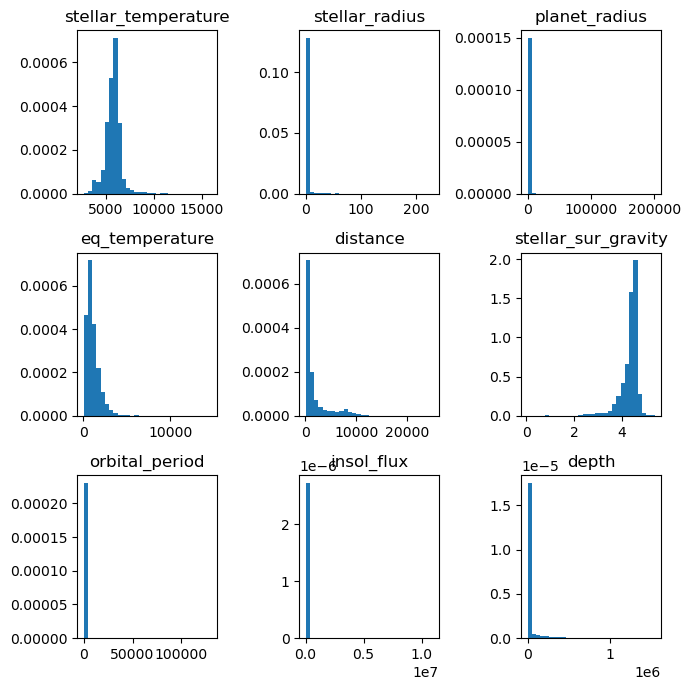

In [8]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)

ax[0,0].hist(kepler_data.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')

ax[0,1].hist(kepler_data.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')

ax[0,2].hist(kepler_data.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')

ax[1,0].hist(kepler_data.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')

ax[1,1].hist(kepler_data[kepler_data.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')

ax[1,2].hist(kepler_data.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')

ax[2,0].hist(kepler_data.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')

ax[2,1].hist(kepler_data.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')

ax[2,2].hist(kepler_data.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

In [9]:
dfx = kepler_data.copy()
for coluna in colunas_dados_faltantes:
    dfx = imput_random(dfx,coluna)
kepler_data = dfx.copy()

In [10]:
kepler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       9564 non-null   object 
 1   longitude            9564 non-null   float64
 2   latitude             9564 non-null   float64
 3   stellar_temperature  9564 non-null   float64
 4   stellar_radius       9564 non-null   float64
 5   planet_radius        9564 non-null   float64
 6   eq_temperature       9564 non-null   float64
 7   stellar_sur_gravity  9564 non-null   float64
 8   orbital_period       9564 non-null   float64
 9   depth                9564 non-null   float64
 10  insol_flux           9564 non-null   float64
 11  mission              9564 non-null   object 
 12  distance             9564 non-null   float64
dtypes: float64(11), object(2)
memory usage: 971.5+ KB


Tratamento das classificações dos planetas

In [11]:
kepler_data['classification'].value_counts()

mapeamento = {'CONFIRMED': 'planet', 'FALSE POSITIVE': 'not planet', 'CANDIDATE': 'candidate'}


kepler_data['classification'] = kepler_data['classification'].replace(mapeamento)

# Verifique se a substituição foi feita corretamente
print(kepler_data['classification'].value_counts())

classification
not planet    4839
planet        2741
candidate     1984
Name: count, dtype: int64


Corrigir ordem das colunas

In [12]:
len(kepler_data.columns)

13

In [13]:
kepler_data.columns

Index(['classification', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature',
       'stellar_sur_gravity', 'orbital_period', 'depth', 'insol_flux',
       'mission', 'distance'],
      dtype='object')

In [14]:
colunas = ['classification', 'mission', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'insol_flux',
       'depth']

kepler_data = kepler_data.reindex(columns=colunas)

Escalonamento com MinMaxScaler() onde a 1a coluna mantida no lugar e as demais escalonadas dentro dos seus próprios limites cada

In [15]:
kepler_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,kepler,291.93423,48.141651,5455.0,0.927,2.26,793.0,678.962909,4.467,9.488036,93.59,615.8
1,planet,kepler,291.93423,48.141651,5455.0,0.927,2.83,443.0,2176.213925,4.467,54.418383,9.11,874.8
2,candidate,kepler,297.00482,48.134129,5853.0,0.868,14.60,638.0,1129.463050,4.544,19.899140,39.30,10829.0
3,not planet,kepler,285.53461,48.285210,5805.0,0.791,33.46,1395.0,212.519983,4.564,1.736952,891.96,8079.2
4,planet,kepler,288.75488,48.226200,6031.0,1.046,2.75,1406.0,297.686309,4.438,2.525592,926.16,603.3


In [16]:
scaler = MinMaxScaler()

kepler_scaled = kepler_data.copy()

cols_to_scale = kepler_scaled.columns[1:] ## isso define as colunas a escalonar, mas nao tira a coluna categorica mission
col_to_skip = 'mission'
cols_to_scale = cols_to_scale.drop(col_to_skip) ## isso retira a coluna mission da lista de colunas a serem escalonadas

kepler_scaled[cols_to_scale] = scaler.fit_transform(kepler_scaled[cols_to_scale].values) ## isso escalona as colunas a serem escalonadas

kepler_scaled_data = pd.DataFrame(kepler_scaled, columns=kepler_scaled.columns)
kepler_scaled_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,kepler,0.552473,0.733837,0.211107,0.003560,0.000011,0.052452,0.025386,0.831296,0.000071,8.548941e-06,0.000400
1,planet,kepler,0.552473,0.733837,0.211107,0.003560,0.000014,0.028548,0.085526,0.831296,0.000417,8.321493e-07,0.000568
2,candidate,kepler,0.784346,0.733360,0.241179,0.003303,0.000072,0.041866,0.043481,0.845778,0.000151,3.589843e-06,0.007025
3,not planet,kepler,0.259826,0.742947,0.237552,0.002968,0.000167,0.093566,0.006650,0.849539,0.000012,8.147573e-05,0.005241
4,planet,kepler,0.407085,0.739203,0.254628,0.004077,0.000013,0.094318,0.010071,0.825842,0.000018,8.459972e-05,0.000391


In [17]:
kepler_scaled_data.to_pickle('data\\kepler\\kepler_data_treated.pkl')